In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

import pandas as pd
import numpy as np

from imblearn.under_sampling import NearMiss
import os
from tensorflow.keras.utils import Sequence



import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools


import shutil
import random
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
keras = tf.compat.v2.keras
Sequence = keras.utils.Sequence





In [2]:
data = pd.read_csv("bankruptcy_data.csv",sep=",")
data.head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [4]:
data.isnull().values.any()

True

In [5]:
np.nan_to_num(data)

array([[ 1.979e+03,  9.800e-01,  1.580e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.980e+03,  9.800e-01,  1.410e+00, ...,  1.400e-02,  4.000e-02,
         0.000e+00],
       [ 1.981e+03,  8.700e-01,  3.100e-01, ...,  3.280e-01,  5.670e-01,
         0.000e+00],
       ...,
       [ 2.011e+03,  9.240e-01, -1.600e-02, ..., -2.000e-02, -1.050e-01,
         0.000e+00],
       [ 2.012e+03,  7.880e-01, -1.330e-01, ..., -1.710e-01, -5.900e-02,
         0.000e+00],
       [ 2.013e+03,  8.850e-01, -6.480e-01, ...,  6.500e-02,  6.300e-02,
         1.000e+00]])

In [6]:
data.isnull().values.any()

True

In [7]:
data.isnull().head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [9]:
data.dropna(how='any').shape

(81204, 15)

In [10]:
data.isnull().values.any()

True

In [11]:
# fill missingdata values with mean column values
data.fillna(data.mean(), inplace=True)

In [12]:
# count the number of NaN values in each column
print(data.isnull().sum())

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64


In [13]:
data.isnull().values.any()

False

In [14]:
data.shape

(92872, 15)

In [15]:
training = data[0:90000]
testing = data[90000:]

In [16]:
print(training.shape)
print(testing.shape)

(90000, 15)
(2872, 15)


In [17]:
#Create independent and Dependent Features
columns = training.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
X = training[columns]
Y = training[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(90000, 15)
(90000,)


In [18]:
#Create independent and Dependent Features
columns = testing.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
XT = testing[columns]
YT = testing[target]
# Print the shapes of X & Y
print(XT.shape)
print(YT.shape)

(2872, 15)
(2872,)


Text(0.5, 0, 'BK')

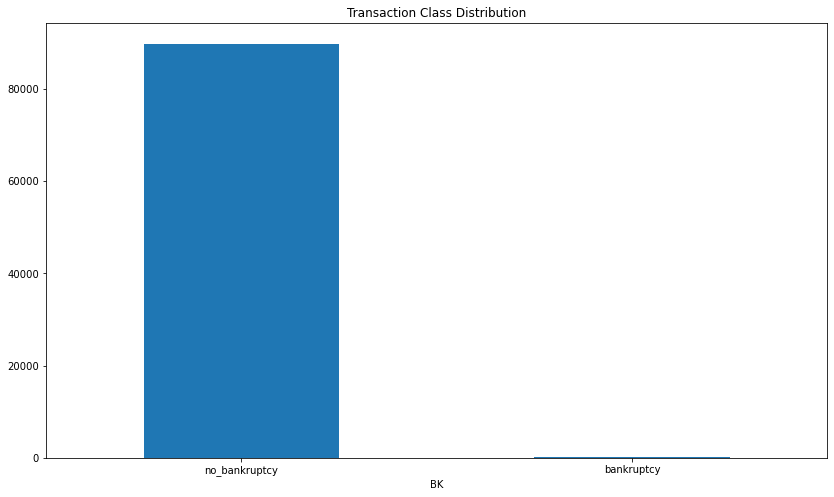

In [19]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["no_bankruptcy", "bankruptcy"]


count_classes = pd.value_counts(training['BK'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("BK")


In [20]:
# summarize class distribution
counter = Counter(Y)
print(counter)

Counter({0: 89842, 1: 158})


In [21]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss



In [22]:
os_us = SMOTETomek()

X_train_res, y_train_res = os_us.fit_sample(X, Y)

In [23]:
X_train_res.shape,y_train_res.shape

((179494, 15), (179494,))

In [24]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 89842, 1: 158})
Resampled dataset shape Counter({0: 89747, 1: 89747})


In [25]:
train_x = np.asarray(X_train_res)
train_y = np.asarray(y_train_res)
test_x = np.asarray(XT)
test_y = np.asarray(YT)

In [26]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(15,)),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.optimizers import Adam





model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 177687 samples, validate on 1795 samples
Epoch 1/30
177687/177687 - 37s - loss: 20.7457 - accuracy: 0.8709 - val_loss: 0.3009 - val_accuracy: 0.9638
Epoch 2/30
177687/177687 - 29s - loss: 0.3258 - accuracy: 0.9824 - val_loss: 0.0292 - val_accuracy: 0.9928
Epoch 3/30
177687/177687 - 31s - loss: 0.2066 - accuracy: 0.9911 - val_loss: 0.0528 - val_accuracy: 0.9894
Epoch 4/30
177687/177687 - 29s - loss: 0.1691 - accuracy: 0.9949 - val_loss: 0.1278 - val_accuracy: 0.9799
Epoch 5/30
177687/177687 - 27s - loss: 0.1742 - accuracy: 0.9967 - val_loss: 0.0044 - val_accuracy: 0.9983
Epoch 6/30
177687/177687 - 27s - loss: 0.1415 - accuracy: 0.9979 - val_loss: 0.1610 - val_accuracy: 0.9783
Epoch 7/30
177687/177687 - 29s - loss: 0.1464 - accuracy: 0.9984 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/30
177687/177687 - 34s - loss: 0.1581 - accuracy: 0.9988 - val_loss: 5.0154e-04 - val_accuracy: 1.0000
Epoch 9/30
177687/177687 - 30s - loss: 0.1404 - accuracy: 0.9990 - val_loss: 5.3293e-04 -

In [29]:
model.evaluate(
    test_x, 
    test_y, 
    batch_size=32, 
    verbose=1, 
    sample_weight=None)

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.9113200359118931, 0.994429]

In [30]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[9.9999750e-01, 2.4580550e-06, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999785e-01, 2.1540541e-06, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999774e-01, 2.3095524e-06, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 1.9044074e-11, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999917e-01, 8.6512739e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.3988664e-07, 9.9999964e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [31]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [32]:

for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0


In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(y_true= test_y, y_pred= rounded_predictions)

In [35]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Confusion matrix, without normalization
[[2472    0]
 [  16  384]]


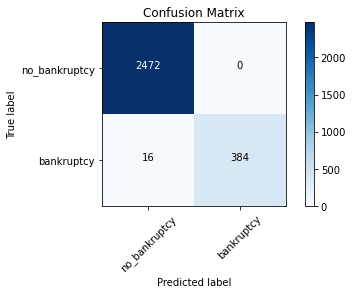

In [36]:
cm_plot_labels = ['no_bankruptcy','bankruptcy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [37]:
probs = model.predict_proba(test_x)

In [38]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

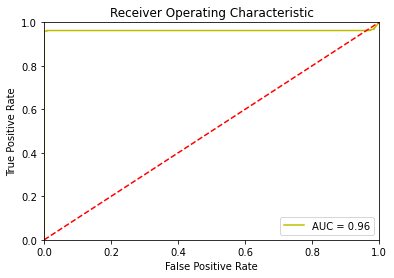

In [39]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
accuracy_score(test_y, rounded_predictions) 

0.9944289693593314

In [41]:
from sklearn.metrics import f1_score


f1_score(test_y, rounded_predictions, average='macro')

0.9881830151415405

In [42]:
from sklearn.metrics import precision_score


precision_score(test_y, rounded_predictions, average='macro' )


0.9967845659163987

In [43]:
from sklearn.metrics import recall_score

recall_score(test_y, rounded_predictions,average='macro' )

0.98

In [26]:
# 1  CNN

#reshape input to be [samples, time steps, features] which is required for CNN
train_x =train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [27]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [28]:
# build network layers
model = Sequential()
model.add(Conv1D(128,3,input_shape=(15, 1)))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=10)

# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 128)           512       
_________________________________________________________________
activation (Activation)      (None, 13, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
______________________________________________________

In [55]:
# build network layers
model = Sequential()
model.add(Conv1D(128,3,input_shape=(15, 1)))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

print(model.summary())

# Dense(32, activation='relu', input_shape=(15,)),
   # Dense(10, activation='softmax'),
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',metrics=['binary_accuracy', 'categorical_accuracy'])


#model.compile(loss='binary_crossentropy  ,sparse_categorical_crossentropy  ', optimizer='adam', metrics=['binary_accuracy', 'categorical_accuracy'])

#model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=10)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 13, 128)           512       
_________________________________________________________________
activation_6 (Activation)    (None, 13, 128)           0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 6, 128)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 769       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
____________________________________________________

In [56]:
model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=10, shuffle=True, verbose=2)

Train on 177699 samples, validate on 1795 samples
Epoch 1/10
177699/177699 - 47s - loss: 7.7441 - binary_accuracy: 0.4949 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000 - val_categorical_accuracy: 1.0000
Epoch 2/10
177699/177699 - 47s - loss: 7.7441 - binary_accuracy: 0.4949 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000 - val_categorical_accuracy: 1.0000
Epoch 3/10
177699/177699 - 46s - loss: 7.7441 - binary_accuracy: 0.4949 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000 - val_categorical_accuracy: 1.0000
Epoch 4/10
177699/177699 - 46s - loss: 7.7441 - binary_accuracy: 0.4949 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000 - val_categorical_accuracy: 1.0000
Epoch 5/10
177699/177699 - 47s - loss: 7.7441 - binary_accuracy: 0.4949 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000 - val_categorical_accuracy: 1.

In [57]:


scores=model.evaluate(
    test_x, 
    test_y, 
     batch_size=32,
    verbose=1, 
    sample_weight=None)
print("Accuracy: %.2f%%" % (scores[1]*100))

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy: 13.93%


In [58]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [59]:
rounded_predictions = np.argmax(predictions, axis=-1)


for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

0.1392757660167131

In [61]:
accuracy_score(test_y, rounded_predictions)

0.8607242339832869

In [44]:
# 2  CNN

In [93]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = (15,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(48, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(58, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(15, activation='sigmoid'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='softmax'))

In [94]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
 model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=10, shuffle=True, verbose=1)

Train on 177699 samples, validate on 1795 samples
Epoch 1/10
177699/177699 [==============================] - 96s 541us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
177699/177699 [==============================] - 92s 516us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
177699/177699 [==============================] - 91s 512us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
177699/177699 [==============================] - 92s 519us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
177699/177699 [==============================] - 92s 517us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
177699/177699 [==============================] - 93s 522us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/

In [96]:
# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 13.93%


In [97]:

scores=model.evaluate(
    test_x, 
    test_y, 
     batch_size=32,
    verbose=1, 
    sample_weight=None)
print("Accuracy: %.2f%%" % (scores[1]*100))

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy: 13.93%


In [98]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [102]:
rounded_predictions = np.argmax(predictions, axis=-1)


for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

0.1392757660167131

In [104]:
accuracy_score(test_y, rounded_predictions)

0.8607242339832869

In [49]:
#3  CNN

In [125]:
model = Sequential()
model.add(Conv1D(4, 2, activation='relu', input_shape = (15,1)))
#model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(8, 2, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(12, 2, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='softmax'))
#10, activation='softmax


#model.summary()

In [126]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 14, 4)             12        
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 7, 4)              0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 7, 4)              0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 6, 8)              72        
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 3, 8)              0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 3, 8)              0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 2, 12)           

In [127]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [128]:
 model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=10, shuffle=True, verbose=1)

Train on 177699 samples, validate on 1795 samples
Epoch 1/10
177699/177699 [==============================] - 61s 346us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
177699/177699 [==============================] - 67s 374us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
177699/177699 [==============================] - 59s 331us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
177699/177699 [==============================] - 59s 332us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
177699/177699 [==============================] - 59s 332us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
177699/177699 [==============================] - 60s 336us/sample - loss: 7.7441 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/

In [129]:
# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 13.93%


In [130]:

scores=model.evaluate(
    test_x, 
    test_y, 
     batch_size=32,
    verbose=1, 
    sample_weight=None)
print("Accuracy: %.2f%%" % (scores[1]*100))

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy: 13.93%


In [131]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [132]:
rounded_predictions = np.argmax(predictions, axis=-1)


for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

0.1392757660167131

In [134]:
accuracy_score(test_y, rounded_predictions)

0.8607242339832869

In [ ]:
# 4  CNN

In [55]:
model = Sequential()
model.add(Conv1D(128,3,input_shape=(15, 1)))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 13, 128)           512       
_________________________________________________________________
activation_1 (Activation)    (None, 13, 128)           0         
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 6, 128)            0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 128)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 769       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
____________________________________________________

In [57]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [62]:


#  model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#  model.fit(x=training_features, y=training_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

In [58]:
 model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=10, shuffle=True, verbose=1)

Train on 177724 samples, validate on 1796 samples
Epoch 1/10
177724/177724 [==============================] - 57s 323us/sample - loss: 3.8478 - accuracy: 0.7310 - val_loss: 2.0672 - val_accuracy: 0.8680
Epoch 2/10
177724/177724 [==============================] - 55s 312us/sample - loss: 2.2031 - accuracy: 0.8126 - val_loss: 1.0809 - val_accuracy: 0.8458
Epoch 3/10
177724/177724 [==============================] - 55s 312us/sample - loss: 1.5043 - accuracy: 0.8296 - val_loss: 0.8213 - val_accuracy: 0.9154
Epoch 4/10
177724/177724 [==============================] - 56s 314us/sample - loss: 1.2093 - accuracy: 0.8417 - val_loss: 0.5992 - val_accuracy: 0.8725
Epoch 5/10
177724/177724 [==============================] - 56s 315us/sample - loss: 1.1016 - accuracy: 0.8523 - val_loss: 0.5347 - val_accuracy: 0.9059
Epoch 6/10
177724/177724 [==============================] - 55s 310us/sample - loss: 1.0371 - accuracy: 0.8548 - val_loss: 0.4363 - val_accuracy: 0.9209
Epoch 7/10
177724/177724 [======

In [59]:
# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 72.77%


In [32]:

history = model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=10, shuffle=True, verbose=1)

Train on 177746 samples, validate on 1796 samples
Epoch 1/10
177746/177746 [==============================] - 96s 539us/sample - loss: 0.6918 - accuracy: 0.6364 - val_loss: 0.1104 - val_accuracy: 0.9933
Epoch 2/10
177746/177746 [==============================] - 97s 543us/sample - loss: 0.5660 - accuracy: 0.7249 - val_loss: 0.1288 - val_accuracy: 0.9939
Epoch 3/10
177746/177746 [==============================] - 93s 523us/sample - loss: 0.5264 - accuracy: 0.7530 - val_loss: 0.1593 - val_accuracy: 1.0000
Epoch 4/10
177746/177746 [==============================] - 99s 556us/sample - loss: 0.5002 - accuracy: 0.7709 - val_loss: 0.1586 - val_accuracy: 1.0000
Epoch 5/10
177746/177746 [==============================] - 98s 549us/sample - loss: 0.4810 - accuracy: 0.7812 - val_loss: 0.1707 - val_accuracy: 1.0000
Epoch 6/10
177746/177746 [==============================] - 87s 492us/sample - loss: 0.4683 - accuracy: 0.7890 - val_loss: 0.1667 - val_accuracy: 1.0000
Epoch 7/10
177746/177746 [======

In [33]:
history.history

{'loss': [0.6918049828063941,
  0.5659887821542586,
  0.5263585595325032,
  0.5002122616847157,
  0.481032749660366,
  0.4683136454685221,
  0.45616487030112546,
  0.4445743211260172,
  0.4305721121119175,
  0.41751028473921875],
 'accuracy': [0.63637435,
  0.7249277,
  0.752979,
  0.7708978,
  0.78119904,
  0.7890473,
  0.7984033,
  0.80581844,
  0.81344163,
  0.82321405],
 'val_loss': [0.11039175476488929,
  0.12877869897237865,
  0.15929721999407345,
  0.15856348719854396,
  0.1706551891525498,
  0.16671555973838326,
  0.1717601746055225,
  0.19720715758927945,
  0.16461415447809116,
  0.14318217630840357],
 'val_accuracy': [0.9933185,
  0.99387527,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

In [31]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 10)

NameError: name 'history' is not defined

In [40]:

model.fit(
   train_x, 
    train_y, 
    batch_size=32, 
    epochs=10, verbose=2, 
    callbacks=None, 
    validation_split=0.2, 
    validation_data=None, 
    shuffle=False, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Train on 143596 samples, validate on 35900 samples
Epoch 1/10
143596/143596 - 34s - loss: 0.6436 - accuracy: 0.7159 - val_loss: 0.5441 - val_accuracy: 0.8686
Epoch 2/10
143596/143596 - 37s - loss: 0.4920 - accuracy: 0.7782 - val_loss: 0.1283 - val_accuracy: 0.9369
Epoch 3/10
143596/143596 - 37s - loss: 0.4498 - accuracy: 0.8179 - val_loss: 0.0662 - val_accuracy: 0.9594
Epoch 4/10
143596/143596 - 38s - loss: 0.3999 - accuracy: 0.8429 - val_loss: 0.0401 - val_accuracy: 0.9641
Epoch 5/10
143596/143596 - 42s - loss: 0.3667 - accuracy: 0.8574 - val_loss: 0.0356 - val_accuracy: 0.9665
Epoch 6/10
143596/143596 - 36s - loss: 0.3467 - accuracy: 0.8666 - val_loss: 0.0318 - val_accuracy: 0.9708
Epoch 7/10
143596/143596 - 35s - loss: 0.3315 - accuracy: 0.8712 - val_loss: 0.0285 - val_accuracy: 0.9721
Epoch 8/10
143596/143596 - 34s - loss: 0.3191 - accuracy: 0.8759 - val_loss: 0.0272 - val_accuracy: 0.9727
Epoch 9/10
143596/143596 - 35s - loss: 0.3056 - accuracy: 0.8810 - val_loss: 0.0261 - val_acc

In [60]:
model.evaluate(
    test_x, 
    test_y, 
    batch_size=32, 
    verbose=1, 
    sample_weight=None)

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.1779786930276823, 0.72771585]

In [61]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[6.9114864e-01],
       [6.2186444e-01],
       [6.3108903e-01],
       ...,
       [1.2090802e-04],
       [2.3987448e-01],
       [3.8475278e-01]], dtype=float32)

In [62]:
predictions

array([[6.9114864e-01],
       [6.2186444e-01],
       [6.3108903e-01],
       ...,
       [1.2090802e-04],
       [2.3987448e-01],
       [3.8475278e-01]], dtype=float32)

In [63]:
rounded_predictions = np.argmax(predictions, axis=-1)




for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [105]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt



cm = confusion_matrix(y_true= test_y, y_pred= rounded_predictions)

In [106]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Confusion matrix, without normalization
[[2472    0]
 [ 400    0]]


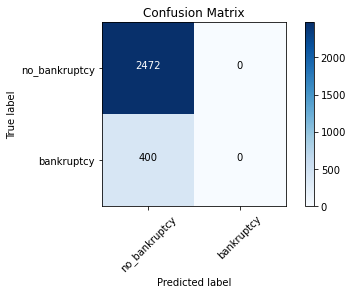

In [107]:
cm_plot_labels = ['no_bankruptcy','bankruptcy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [67]:
probs = model.predict_proba(test_x)

In [68]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

IndexError: index 1 is out of bounds for axis 1 with size 1

NameError: name 'fpr' is not defined

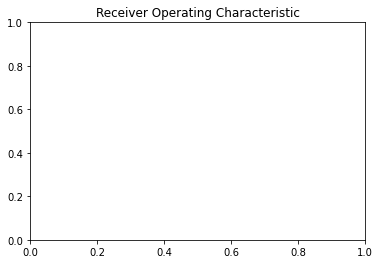

In [69]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
accuracy_score(test_y, rounded_predictions)

0.8607242339832869

In [71]:
from sklearn.metrics import f1_score


f1_score(test_y, rounded_predictions, average='macro')

0.4625748502994012

In [73]:
from sklearn.metrics import precision_score


precision_score(test_y, rounded_predictions, average='macro' )

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.43036211699164345

In [72]:
from sklearn.metrics import recall_score

recall_score(test_y, rounded_predictions,average='macro' )

0.5

In [31]:
history = model.fit(train_x , train_y, epochs=10, validation_data=(test_x, test_y), verbose=1)

Train on 179506 samples, validate on 2872 samples
Epoch 1/10
179506/179506 [==============================] - 36s 203us/sample - loss: 0.8432 - accuracy: 0.5290 - val_loss: 0.7745 - val_accuracy: 0.1396
Epoch 2/10
179506/179506 [==============================] - 31s 171us/sample - loss: 0.7271 - accuracy: 0.5476 - val_loss: 0.7644 - val_accuracy: 0.1410
Epoch 3/10
179506/179506 [==============================] - 31s 171us/sample - loss: 0.6905 - accuracy: 0.5655 - val_loss: 0.7798 - val_accuracy: 0.1417
Epoch 4/10
179506/179506 [==============================] - 30s 169us/sample - loss: 0.6706 - accuracy: 0.5913 - val_loss: 0.8161 - val_accuracy: 0.1435
Epoch 5/10
179506/179506 [==============================] - 31s 172us/sample - loss: 0.6541 - accuracy: 0.6227 - val_loss: 0.8637 - val_accuracy: 0.1581
Epoch 6/10
179506/179506 [==============================] - 31s 174us/sample - loss: 0.6346 - accuracy: 0.6568 - val_loss: 0.9014 - val_accuracy: 0.1654
Epoch 7/10
179506/179506 [======

In [31]:
history = model.fit(train_x , train_y, epochs=10, validation_data=(test_x, test_y), verbose=1)

ValueError: Error when checking input: expected conv1d_input to have shape (256, 1) but got array with shape (15, 1)

In [28]:
  model = Sequential()

In [75]:
# 1 build LSTM layers
model = Sequential()
model.add(LSTM(100, dropout=0.2, input_shape=(15,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10,batch_size=64,verbose=1)

Train on 179520 samples, validate on 2872 samples
Epoch 1/10
179520/179520 [==============================] - 77s 426us/sample - loss: 0.4257 - accuracy: 0.8076 - val_loss: 0.4803 - val_accuracy: 0.7517
Epoch 2/10
179520/179520 [==============================] - 76s 421us/sample - loss: 0.2297 - accuracy: 0.9131 - val_loss: 0.3582 - val_accuracy: 0.8228
Epoch 3/10
179520/179520 [==============================] - 68s 379us/sample - loss: 0.1685 - accuracy: 0.9367 - val_loss: 0.3423 - val_accuracy: 0.8360
Epoch 4/10
179520/179520 [==============================] - 68s 381us/sample - loss: 0.1455 - accuracy: 0.9427 - val_loss: 0.3849 - val_accuracy: 0.8280
Epoch 5/10
179520/179520 [==============================] - 69s 386us/sample - loss: 0.1344 - accuracy: 0.9460 - val_loss: 0.3258 - val_accuracy: 0.8614
Epoch 6/10
179520/179520 [==============================] - 70s 388us/sample - loss: 0.1253 - accuracy: 0.9491 - val_loss: 0.4101 - val_accuracy: 0.8249
Epoch 7/10
179520/179520 [======

In [79]:
# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.62%


In [80]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[0.7334219 ],
       [0.34901872],
       [0.29410085],
       ...,
       [0.01069915],
       [0.0239298 ],
       [0.95806146]], dtype=float32)

In [81]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Confusion matrix, without normalization
[[2472    0]
 [ 400    0]]


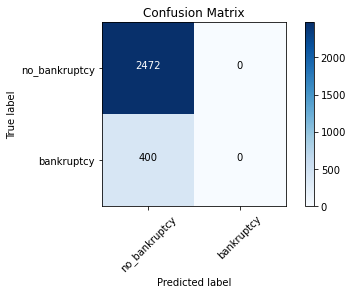

In [82]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true= test_y, y_pred= rounded_predictions)

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

    
    
    
    cm_plot_labels = ['no_bankruptcy','bankruptcy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
    


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [76]:
#reshape input to be [samples, time steps, features] which is required for LSTM
train_x =train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [74]:
### 2  Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [84]:
# build LSTM layers
model = Sequential()
model.add(LSTM(100, dropout=0.2, input_shape=(15,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
#model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=10)


model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10,batch_size=64,verbose=1)

Train on 179520 samples, validate on 2872 samples
Epoch 1/10
179520/179520 [==============================] - 75s 418us/sample - loss: 0.1448 - accuracy: 0.9399 - val_loss: 0.3759 - val_accuracy: 0.8165
Epoch 2/10
179520/179520 [==============================] - 69s 384us/sample - loss: 0.0942 - accuracy: 0.9620 - val_loss: 0.3532 - val_accuracy: 0.8353
Epoch 3/10
179520/179520 [==============================] - 69s 387us/sample - loss: 0.0814 - accuracy: 0.9674 - val_loss: 0.2853 - val_accuracy: 0.8827
Epoch 4/10
179520/179520 [==============================] - 70s 388us/sample - loss: 0.0722 - accuracy: 0.9709 - val_loss: 0.2817 - val_accuracy: 0.8834
Epoch 5/10
179520/179520 [==============================] - 69s 385us/sample - loss: 0.0669 - accuracy: 0.9728 - val_loss: 0.2728 - val_accuracy: 0.8889
Epoch 6/10
179520/179520 [==============================] - 70s 391us/sample - loss: 0.0621 - accuracy: 0.9757 - val_loss: 0.2666 - val_accuracy: 0.8917
Epoch 7/10
179520/179520 [======

In [87]:
# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.10%


In [96]:
### 3  Create the Stacked LSTM model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(15,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [97]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 15, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 15, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10,batch_size=64,verbose=1)

Train on 179520 samples, validate on 2872 samples
Epoch 1/10
179520/179520 [==============================] - 134s 746us/sample - loss: 0.0290 - val_loss: 3.0826e-04
Epoch 2/10
179520/179520 [==============================] - 120s 670us/sample - loss: 6.0284e-05 - val_loss: 8.5023e-05
Epoch 3/10
179520/179520 [==============================] - 120s 666us/sample - loss: 4.1173e-05 - val_loss: 1.0085e-04
Epoch 4/10
179520/179520 [==============================] - 120s 666us/sample - loss: 2.9931e-05 - val_loss: 1.5692e-05
Epoch 5/10
179520/179520 [==============================] - 119s 665us/sample - loss: 2.2202e-05 - val_loss: 8.3510e-05
Epoch 6/10
179520/179520 [==============================] - 120s 667us/sample - loss: 1.6923e-05 - val_loss: 5.0202e-06
Epoch 7/10
179520/179520 [==============================] - 125s 696us/sample - loss: 1.3775e-05 - val_loss: 9.9555e-06
Epoch 8/10
179520/179520 [==============================] - 122s 681us/sample - loss: 1.0335e-05 - val_loss: 5.818

In [100]:
# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

IndexError: invalid index to scalar variable.

In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

In [82]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y,train_predict))

0.0690465829235184

In [83]:

### Test Data RMSE
math.sqrt(mean_squared_error(test_y,test_predict))

0.2462004333651116

In [101]:
model.evaluate(
    test_x, 
    test_y, 
    batch_size=32, 
    verbose=1, 
    sample_weight=None)

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

3.120358330362507e-06

In [102]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[-3.4299586e-04],
       [-2.6242528e-04],
       [-2.1087937e-05],
       ...,
       [ 3.2627117e-04],
       [ 3.0432548e-04],
       [ 1.0017111e+00]], dtype=float32)

In [103]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [104]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [105]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [106]:
cm = confusion_matrix(y_true= test_y, y_pred= rounded_predictions)

In [107]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Confusion matrix, without normalization
[[2472    0]
 [ 400    0]]


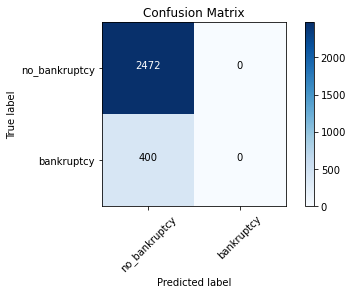

In [108]:
cm_plot_labels = ['no_bankruptcy','bankruptcy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [94]:
probs = model.predict_proba(test_x)

In [95]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

IndexError: index 1 is out of bounds for axis 1 with size 1

NameError: name 'fpr' is not defined

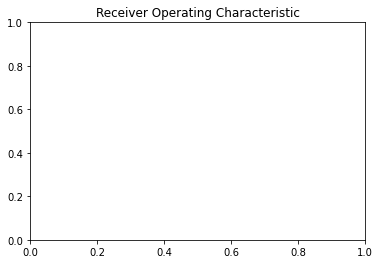

In [96]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
accuracy_score(test_y, rounded_predictions)

0.8607242339832869

In [98]:
from sklearn.metrics import f1_score


f1_score(test_y, rounded_predictions, average='macro')

0.4625748502994012

In [99]:
from sklearn.metrics import precision_score


precision_score(test_y, rounded_predictions, average='macro' )


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.43036211699164345

In [79]:
from sklearn.metrics import recall_score

recall_score(test_y, rounded_predictions,average='macro' )

0.5

In [83]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
mlp.fit(train_x,train_y)

MLPClassifier(hidden_layer_sizes=(13, 10, 2), max_iter=1000)

In [84]:
predictions =mlp.predict(test_x)

from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(test_y,predictions)
print(confusion_matrix(test_y,predictions))


[[2472    0]
 [ 400    0]]


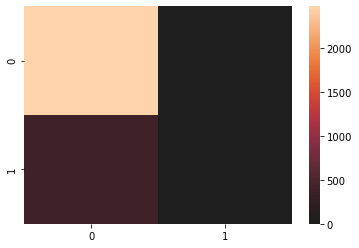

In [85]:
sns.heatmap(cm, center=True)
plt.show()

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

0.8607242339832869

In [101]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(train_x,train_y)

In [106]:
model = MLPClassifier(random_state=1, max_iter=300)

In [107]:
model.fit(train_x,train_y)

MLPClassifier(max_iter=300, random_state=1)

In [110]:
predictions =model.predict(
    test_x, 
     
   )
predictions 

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [111]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [112]:

for i in rounded_predictions:
    print(i)

TypeError: 'numpy.int64' object is not iterable

In [113]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [114]:
cm = confusion_matrix(y_true= test_y, y_pred= rounded_predictions)

TypeError: Singleton array 14 cannot be considered a valid collection.

In [115]:
accuracy_score(test_y, rounded_predictions)

TypeError: Singleton array 14 cannot be considered a valid collection.

In [102]:
clf.predict(test_x[:5, :])

array([0, 0, 0, 0, 0], dtype=int64)

In [103]:
clf.score(test_x, test_y)

0.9874651810584958

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,clf)

TypeError: Expected sequence or array-like, got <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>

In [ ]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 